In [1]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors

from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

import matplotlib.pyplot as plt

from scipy.stats import randint
from numpy import argmax
from scipy import stats

In [2]:
from sklearn.metrics import cohen_kappa_score

In [3]:
import sklearn
sklearn.__version__

'1.1.1'

In [4]:
from collections import Counter
from sklearn.metrics import cohen_kappa_score

#Cmax significance with each other (with DILI compounds)

In [5]:
test_data_ncv= pd.read_csv("./test_data_ncv_DILIst_888.csv")
test_data_heldouttest= pd.read_csv("./test_data_heldouttest_DILIst_223.csv")

In [6]:
test_data_ncv

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)O)=C(CSc3nnnn...,1,1,DILIst Classification,DILI,UHRBTBZOWWGKMK-UHFFFAOYSA-N,UHRBTBZOWWGKMK,COC1(NC(=O)CSC(F)F)C(=O)[NH+]2C(C(=O)[O-])=C(C...,0,1,...,6.555357,10.733545,82.269503,496.064645,9.921293,3113.0,51.0,166.0,200.0,7.250000
1,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,1,1,DILIst Classification,DILI,UIEATEWHFDRYRU-UHFFFAOYSA-N,UIEATEWHFDRYRU,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)[NH+]1CCCC1,0,1,...,6.293419,9.845276,74.440588,367.274390,5.923780,1895.0,34.0,132.0,148.0,6.138889
2,Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)...,1,1,DILIst Classification oral,DILI,UIOFUWFRIANQPC-UHFFFAOYSA-N,UIOFUWFRIANQPC,Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)[NH+]2C1S...,0,0,...,7.853605,10.768843,83.380114,453.056148,9.639493,2402.0,53.0,170.0,211.0,6.291667
3,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,1,1,DILIst Classification Oral,DILI,ULGZDMOVFRHVEP-UHFFFAOYSA-N,ULGZDMOVFRHVEP,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,0,0,...,0.000000,11.023323,89.748896,734.468518,6.172004,8842.0,101.0,270.0,324.0,11.013889
4,Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2,1,1,DILIst Classification,DILI,UMSGKTJDUHERQW-UHFFFAOYSA-N,UMSGKTJDUHERQW,Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2,0,0,...,7.618251,10.155063,72.828985,391.949807,12.248431,921.0,40.0,124.0,152.0,4.694444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,1,DILIst Classification,DILI,KYRVNWMVYQXFEU-UHFFFAOYSA-N,KYRVNWMVYQXFEU,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,0,...,7.285507,9.858333,70.378545,301.052112,9.407879,994.0,29.0,110.0,129.0,4.666667
884,CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...,0,1,DILIst Classification Intravenous,DILI,KXNPVXPOPUZYGB-UHFFFAOYSA-N,KXNPVXPOPUZYGB,CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...,0,1,...,0.000000,10.488075,71.463013,509.254066,7.072973,3704.0,57.0,180.0,209.0,7.625000
885,CCC(c1cccc(O)c1)C(C)CN(C)C,0,1,DILIst Classification Oral,DILI,KWTWDQCKEHXFFR-UHFFFAOYSA-N,KWTWDQCKEHXFFR,CCC(c1cccc(O)c1)C(C)C[NH+](C)C,0,1,...,0.000000,9.353834,47.590867,222.185241,5.554631,448.0,21.0,74.0,82.0,3.722222
886,CC(N)Cc1ccccc1,0,1,DILIst Classification Oral,DILI,KWTSXDURSIMDCE-UHFFFAOYSA-N,KWTSXDURSIMDCE,CC([NH3+])Cc1ccccc1,0,1,...,0.000000,8.564268,38.519688,136.112076,5.671336,126.0,9.0,44.0,46.0,2.333333


In [7]:
test_data_heldouttest

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,1,1,DILIst Classification Oral,DILI,AAKJLRGGTJKAMG-UHFFFAOYSA-N,AAKJLRGGTJKAMG,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,0,0,...,0.000000,10.116298,64.016835,393.168856,7.560940,2396.0,43.0,142.0,163.0,6.833333
1,CC1OC1[P](=O)(=O)O,1,1,DILIst Classification Oral,DILI,UJNUDOLLRRCQDH-UHFFFAOYSA-N,UJNUDOLLRRCQDH,CC1OC1[P](=O)(=O)O,0,0,...,7.753194,9.180603,57.029675,137.000370,9.785741,61.0,7.0,42.0,48.0,1.611111
2,CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1,1,1,DILIst Classification Oral,DILI,UNAANXDKBXWMLN-UHFFFAOYSA-N,UNAANXDKBXWMLN,CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1,0,1,...,0.000000,10.141756,53.045750,280.182654,6.090927,666.0,29.0,98.0,116.0,4.194444
3,COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...,1,1,DILIst Classification Oral,DILI,UXOWGYHJODZGMF-UHFFFAOYSA-N,UXOWGYHJODZGMF,COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...,0,1,...,0.000000,10.297521,75.192100,552.400713,5.939793,5882.0,58.0,184.0,206.0,8.930556
4,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,1,1,DILIst Classification Oral,DILI,VGKDLMBJGBXTGI-UHFFFAOYSA-N,VGKDLMBJGBXTGI,C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,0,0,...,0.000000,10.027694,53.970324,306.081081,8.054765,770.0,34.0,106.0,127.0,4.472222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,1,DILIst Classification Topical,DILI,JLYXXMFPNIAWKQ-UHFFFAOYSA-N,JLYXXMFPNIAWKQ,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,0,...,0.000000,9.542876,43.309911,287.860066,15.992226,174.0,21.0,60.0,72.0,2.666667
219,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,1,DILIst Classification Oral,DILI,JAUORDHNHDCTAS-UHFFFAOYSA-N,JAUORDHNHDCTAS,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,0,...,0.000000,10.364040,61.506713,366.102272,8.135606,1705.0,47.0,142.0,172.0,5.638889
220,C=Cc1ccc(S(=O)(=O)O)cc1,0,1,DILIst Classification Oral,DILI,MAGFQRLKWCCTQJ-UHFFFAOYSA-N,MAGFQRLKWCCTQJ,C=Cc1ccc(S(=O)(=O)[O-])cc1,0,0,...,0.000000,9.246190,42.667356,183.012139,9.632218,201.0,15.0,58.0,64.0,2.666667
221,OCC(O)c1oc(O)c(O)c1O,0,1,DILIst Classification Intravenous,DILI,LPYXWGMUVRGUOY-UHFFFAOYSA-N,LPYXWGMUVRGUOY,OCC(O)c1oc(O)c(O)c1O,0,1,...,6.985642,9.261509,56.914288,176.032088,8.801604,188.0,17.0,58.0,68.0,2.777778


In [8]:
file = open("./features_morgan_mordred_maccs_physc.txt", "r")
file_lines = file.read()
all_features = file_lines.split("\n")
all_features = all_features[:-1]
len(all_features)

857

In [9]:
all_features

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpDiam_A',
 'SpAD_A',
 'LogEE_A',
 'VE1_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe',
 'ATS6pe',
 'ATS7pe',
 'ATS8pe',
 'ATS0are',
 'ATS1are',
 'ATS2are',
 'ATS3are',
 'ATS4are',
 'ATS5are',
 'ATS6a

In [10]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[all_features]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [11]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[all_features]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [12]:
from collections import Counter
#from imblearn.over_sampling import SMOTE
import pickle

#Adding predictions for Cmax to the predicted proxy data
for column in ["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]:
    
    regressor = pickle.load(open(f"./bestlivmodel_{column}_model.sav", 'rb'))
    
    #Add predictions to held out test set dili
    y_pred = regressor.predict(X_heldouttest)
    test_data_heldouttest[column]=y_pred
    
    #Add predictions to NCV compounds  dili
    y_pred = regressor.predict(X_ncv)
    test_data_ncv[column]=y_pred
    
test_data_heldouttest   

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,median pMolar unbound plasma concentration,median pMolar total plasma concentration
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,1,1,DILIst Classification Oral,DILI,AAKJLRGGTJKAMG-UHFFFAOYSA-N,AAKJLRGGTJKAMG,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,0,0,...,64.016835,393.168856,7.560940,2396.0,43.0,142.0,163.0,6.833333,7.483373,5.992269
1,CC1OC1[P](=O)(=O)O,1,1,DILIst Classification Oral,DILI,UJNUDOLLRRCQDH-UHFFFAOYSA-N,UJNUDOLLRRCQDH,CC1OC1[P](=O)(=O)O,0,0,...,57.029675,137.000370,9.785741,61.0,7.0,42.0,48.0,1.611111,4.853903,3.857602
2,CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1,1,1,DILIst Classification Oral,DILI,UNAANXDKBXWMLN-UHFFFAOYSA-N,UNAANXDKBXWMLN,CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1,0,1,...,53.045750,280.182654,6.090927,666.0,29.0,98.0,116.0,4.194444,6.839991,6.538902
3,COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...,1,1,DILIst Classification Oral,DILI,UXOWGYHJODZGMF-UHFFFAOYSA-N,UXOWGYHJODZGMF,COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...,0,1,...,75.192100,552.400713,5.939793,5882.0,58.0,184.0,206.0,8.930556,7.129055,6.467869
4,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,1,1,DILIst Classification Oral,DILI,VGKDLMBJGBXTGI-UHFFFAOYSA-N,VGKDLMBJGBXTGI,C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,0,0,...,53.970324,306.081081,8.054765,770.0,34.0,106.0,127.0,4.472222,7.778547,6.091766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,1,DILIst Classification Topical,DILI,JLYXXMFPNIAWKQ-UHFFFAOYSA-N,JLYXXMFPNIAWKQ,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,0,...,43.309911,287.860066,15.992226,174.0,21.0,60.0,72.0,2.666667,5.537793,4.684940
219,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,1,DILIst Classification Oral,DILI,JAUORDHNHDCTAS-UHFFFAOYSA-N,JAUORDHNHDCTAS,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,0,...,61.506713,366.102272,8.135606,1705.0,47.0,142.0,172.0,5.638889,7.499033,5.272305
220,C=Cc1ccc(S(=O)(=O)O)cc1,0,1,DILIst Classification Oral,DILI,MAGFQRLKWCCTQJ-UHFFFAOYSA-N,MAGFQRLKWCCTQJ,C=Cc1ccc(S(=O)(=O)[O-])cc1,0,0,...,42.667356,183.012139,9.632218,201.0,15.0,58.0,64.0,2.666667,5.039606,4.289188
221,OCC(O)c1oc(O)c(O)c1O,0,1,DILIst Classification Intravenous,DILI,LPYXWGMUVRGUOY-UHFFFAOYSA-N,LPYXWGMUVRGUOY,OCC(O)c1oc(O)c(O)c1O,0,1,...,56.914288,176.032088,8.801604,188.0,17.0,58.0,68.0,2.777778,4.915854,4.331399


In [13]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [14]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [15]:
X_ncv.shape

(888, 2)

In [16]:
X_heldouttest.shape

(223, 2)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from scipy.stats import randint
from numpy import argmax
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestRegressor

In [18]:


#built on PK ncv data, test on DILI

df_subset =test_data_ncv
    
y_train = np.array(df_subset['TOXICITY'])
features= df_subset[["median pMolar unbound plasma concentration", "median pMolar total plasma concentration"]]

feature_list = list(features.columns)
X_train = np.array(features)
    
print(len(X_train[0]))
print(len(y_train))
print(len(X_heldouttest[0]))
print(len(y_heldouttest))
    
print('y_train dataset shape %s' % Counter(y_train))
print('y_heldouttest dataset shape %s' % Counter(y_heldouttest))
          
    
#Hyperparameter Optimisation
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
# Instantiate the RandomHalving search model
param_dist_grid = { 
            'max_depth': randint(5, 20),
            'max_features': randint(30, 50),
            'min_samples_leaf': randint(5, 15),
            'min_samples_split': randint(5, 15),
            'n_estimators':[200, 300, 400, 500, 600],
            'bootstrap': [True, False],
            'oob_score': [False],
            'random_state': [42],
            'criterion': ['gini', 'entropy'],
            'n_jobs': [30],
            'class_weight' : [None, 'balanced_subsample', 'balanced']}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)    
rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=2, random_state=42, n_jobs=30, verbose=1, cv = inner_cv)
rsh.fit(X_train, y_train)
classifier = rsh.best_estimator_
classifier.fit(X_train, y_train)
    

2
888
2
223
y_train dataset shape Counter({1: 560, 0: 328})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 20
max_resources_: 888
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 44
n_resources: 20
Fitting 5 folds for each of 44 candidates, totalling 220 fits
----------
iter: 1
n_candidates: 22
n_resources: 40
Fitting 5 folds for each of 22 candidates, totalling 110 fits
----------
iter: 2
n_candidates: 11
n_resources: 80
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 3
n_candidates: 6
n_resources: 160
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 3
n_resources: 320
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 2
n_resources: 640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomForestClassifier(criterion='entropy', max_depth=6, max_features=34,
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=400, n_jobs=30, random_state=42)

Best Threshold=0.607289
[[30 37]
 [57 99]]
              precision    recall  f1-score   support

           0       0.34      0.45      0.39        67
           1       0.73      0.63      0.68       156

    accuracy                           0.58       223
   macro avg       0.54      0.54      0.53       223
weighted avg       0.61      0.58      0.59       223

balanced_accuracy_score  0.5411882893226176
matthews_corrcoef  0.07742377994917514
Sensitivity 0.44776119402985076
Specificity 0.6346153846153846
f1 0.6780821917808219
LR+ 1.225451688923802
ppv 0.7279411764705882
average_precision_score 0.7767255089014163
roc_auc_score 0.576444699579028


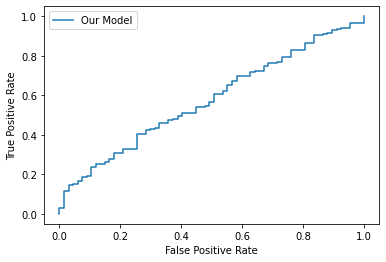

In [19]:
#Add predictions to held out test set dili
y_proba = classifier.predict_proba(X_heldouttest)[:,1]
  
#Add predictions to NCV compounds  dili
y_proba = classifier.predict_proba(X_ncv)[:,1]
    
#Find best threshold using NCV DIlI compounds
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
    
#Comapre for held out test set
y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh  else 0 for x in y_proba ]

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')
    
print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)
       
print("average_precision_score", metrics.average_precision_score(y_heldouttest, y_proba))
    
print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba)) 
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()  

